## Classification: Detect Pipe or Rock with Sonar Data

Classification of Rock or Mine with [sonar data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)). Sonar (sound navigation and ranging) uses sound waves to detect objects, similar to how a bat uses echo-location to navigate, and detect objects. It is the same principle with seismic data for non-invasive underground exploration of geologic formations to locate oil or gas reserves.

```python
url = 'https://apmonitor.com/pds/uploads/Main/sonar_detection.txt'
```

The data set of sonar is taken from different angles and locations to detect the rock or pipe. The data was collected in a laboratory under controlled conditions as a case study for detecting underground pipe. There are 111 labeled sets for the metal cyclinder (pipe) and 97 sonar patterns from rocks with similar conditions. Each sample is a set of 60 numbers between 0 and 1 that represents the integrated energy within a distinct frequency band and for a given time period.	

[Pipe / Rock Sonar Case Study](https://apmonitor.com/pds/index.php/Main/SonarDetection) on [Machine Learning for Engineers](https://apmonitor.com/pds/index.php/Main/SonarDetection)

Although this case study is specifc to detecting differences between metal pipe and rock, it is similar to detection of other underground features such as tunnels, mines, aquifers, and fluid-filled pipelines.

### Import Packages

Import *pandas*, *matplotlib*, and other packages that you need for this exercise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read Data

Read data as a Pandas dataframe with `data=read_csv(url)`. Show 10 random rows with `data.sample(10)`. 

In [2]:
data = pd.read_csv(r'http://apmonitor.com/pds/uploads/Main/sonar_detection.txt')
data.sample(10)

,Ang1,Ang2,Ang3,Ang4,Ang5,Ang6,Ang7,Ang8,Ang9,Ang10,...,Ang52,Ang53,Ang54,Ang55,Ang56,Ang57,Ang58,Ang59,Ang60,Class
127,0.0209,0.0261,0.0120,0.0768,0.1064,0.1680,0.3016,0.3460,0.3314,0.4125,...,0.0057,0.0159,0.0085,0.0372,0.0101,0.0127,0.0288,0.0129,0.0023,M
133,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,M
93,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,R
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,M
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068,R
41,0.0093,0.0185,0.0056,0.0064,0.0260,0.0458,0.0470,0.0057,0.0425,0.0640,...,0.0069,0.0064,0.0129,0.0114,0.0054,0.0089,0.0050,0.0058,0.0025,R
53,0.0293,0.0378,0.0257,0.0062,0.0130,0.0612,0.0895,0.1107,0.0973,0.0751,...,0.0065,0.0072,0.0108,0.0051,0.0102,0.0041,0.0055,0.0050,0.0087,R
120,0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228,0.1508,...,0.0040,0.0122,0.0107,0.0112,0.0102,0.0052,0.0024,0.0079,0.0031,M
163,0.0072,0.0027,0.0089,0.0061,0.0420,0.0865,0.1182,0.0999,0.1976,0.2318,...,0.0078,0.0071,0.0081,0.0034,0.0064,0.0037,0.0036,0.0012,0.0037,M
165,0.0221,0.0065,0.0164,0.0487,0.0519,0.0849,0.0812,0.1833,0.2228,0.1810,...,0.0089,0.0051,0.0015,0.0075,0.0058,0.0016,0.0070,0.0074,0.0038,M


### Data Visualization



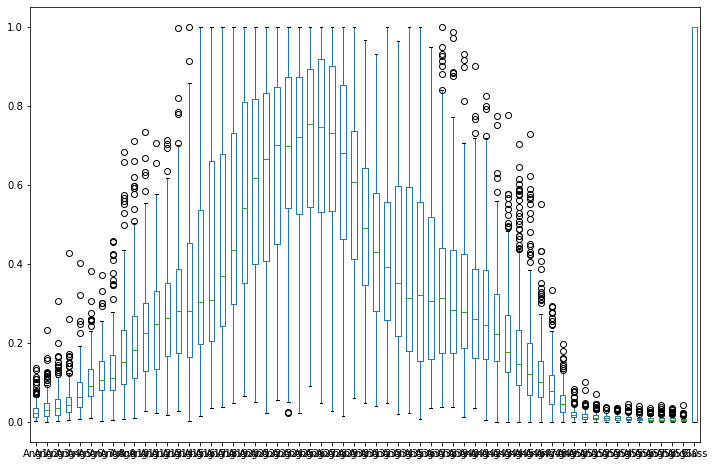

In [18]:
data.plot(kind='box',figsize=(12,8))
plt.show()

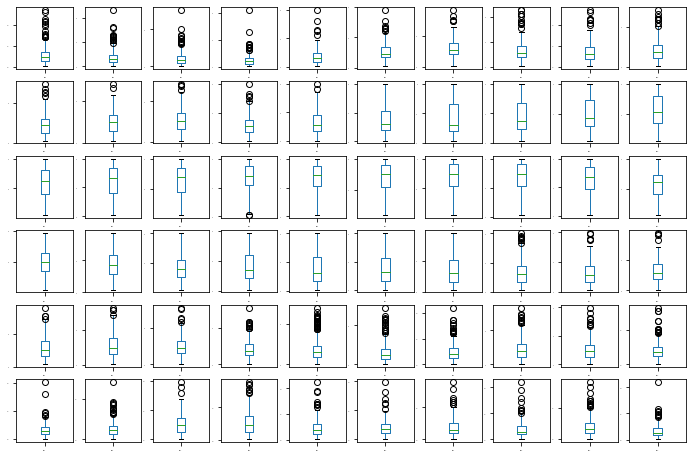

In [3]:
data.plot(kind='box', subplots=True, layout=(6,10),\
             sharex=False, legend=False, fontsize=1, \
             figsize=(12,8))
plt.show()

In [4]:
data.groupby('Class').size()

Class
M    111
R     97
dtype: int64

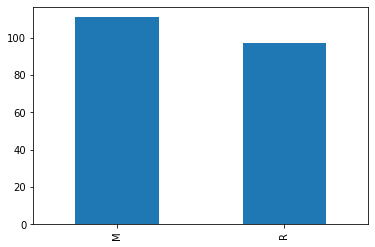

In [5]:
data['Class'].value_counts().plot(kind='bar')
plt.show()

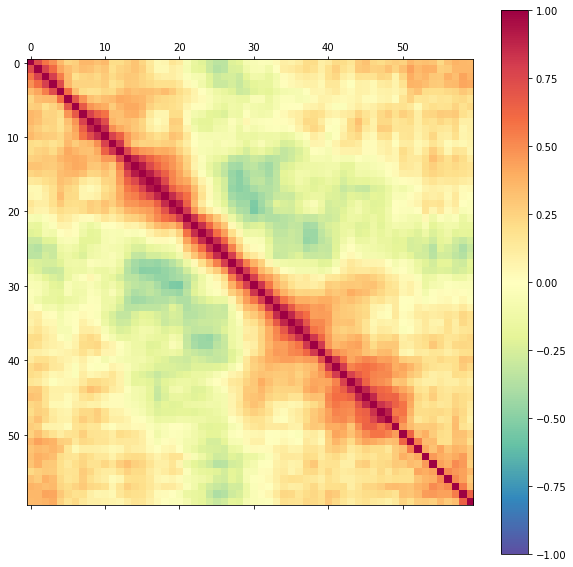

In [6]:
# correlation matrix
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, cmap=cm.Spectral_r, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.savefig('sonar_correlation.png')
plt.show()

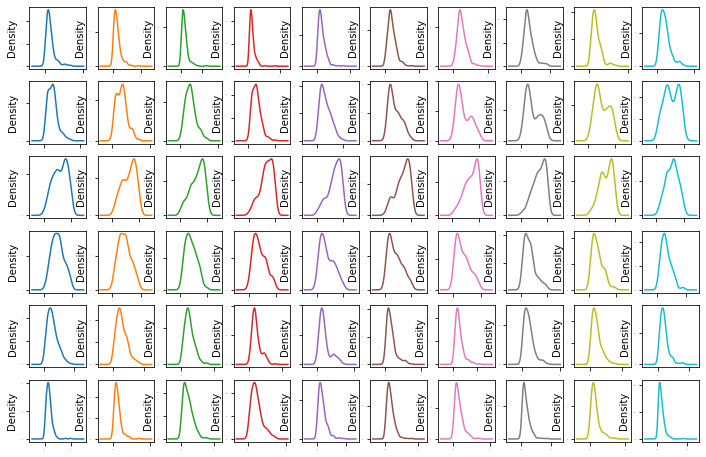

In [7]:
data.plot(kind='density', subplots=True, layout=(6,10),\
             sharex=False, legend=False, fontsize=1, \
             figsize=(12,8))
plt.show()

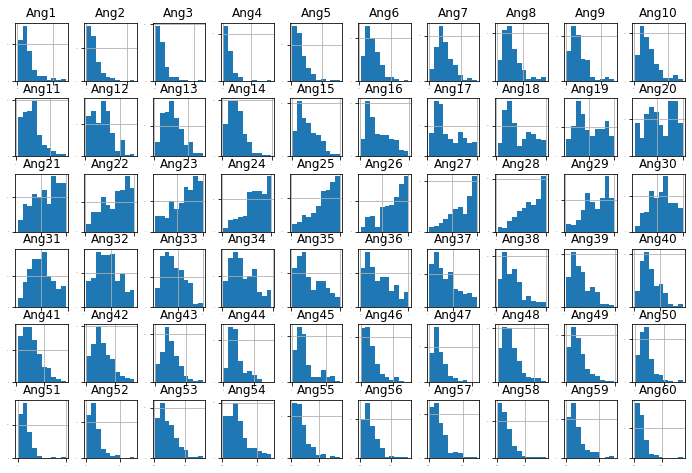

In [8]:
data.hist(sharex=False, sharey=False, layout=(6,10),\
        xlabelsize=1, ylabelsize=1, figsize=(12,8))
plt.show()

In [9]:
X = data.drop(columns = ['Class'])

data = data.replace('M',1).replace('R',0)
y = data.Class

What insights do you gain from the data visualization and exploration? In particular, comment on the presence of uniform data distributions, outliers, missing data, and other data quality issues.

### Scale Data

Scale data with a [Standard Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) so that all features (sonar returns) are scaled. 

In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X))
X.columns = data.columns[:-1]

### Best Features

What are the factors that are most correlated or influential for predicting pipe versus rock. Use the `SelectKBest` package to produce a ranked list.

In [20]:
# Print 5 best features
from sklearn.feature_selection import SelectKBest
k = 5
k_best = SelectKBest(k=k).fit_transform(X,y)
for i, column in enumerate(X.columns):
    if X[column].loc[0] in (k_best[0][0:5]):
        print(column)

Ang10
Ang11
Ang12
Ang45
Ang49


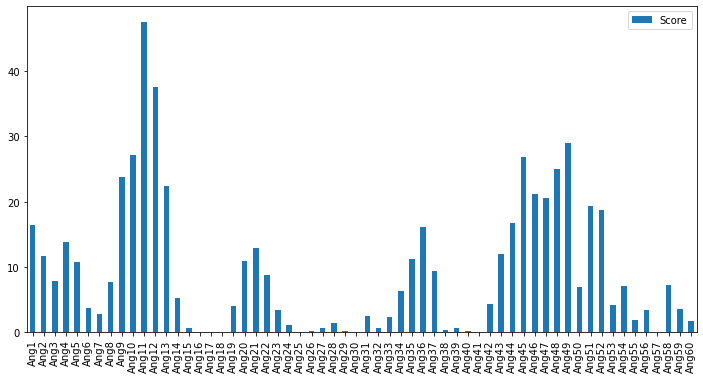

In [22]:
# Produce Select K Best scores for all
from sklearn.feature_selection import SelectKBest
%matplotlib inline

bestfeatures = SelectKBest(k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = X.columns
scores.plot(kind='bar',figsize=(12,6))
plt.show()

Text(0, 0.5, 'Best Features')

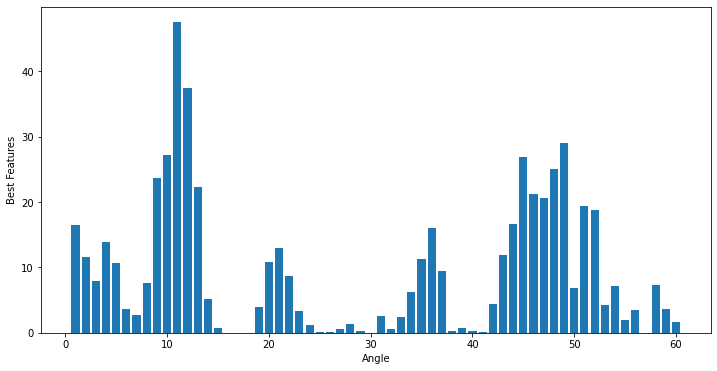

In [31]:
plt.figure(figsize=(12,6))
xlabel = [i for i in range(1,61)]
plt.bar(xlabel,fit.scores_)
plt.xlabel('Angle')
plt.ylabel('Best Features')

In [32]:
dfscores[0].sort_values()
dfscores['angle'] = X.columns
dfscores[0:10]

,0,angle
0,16.418413,Ang1
1,11.637284,Ang2
2,7.901260,Ang3
3,13.808276,Ang4
4,10.702273,Ang5
5,3.671410,Ang6
6,2.748634,Ang7
7,7.657461,Ang8
8,23.738683,Ang9
9,27.131299,Ang10


### Train / Test Split

Split the data into **Test** and **Train** sets. Randomly select values that split the data into a train (80%) and test (20%) set by using the sklearn `train_test_split` with `shuffle=True`. 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100, shuffle = True)

### Import Classifier Packages

Classification: Use 8 classification methods. Possible regression methods are:

- AdaBoost
- Logistic Regression
- Naïve Bayes
- Stochastic Gradient Descent
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Support Vector Classifier
- Deep Learning Neural Network

The [Scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) has additional information on classifiers.

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Initialize Classifiers

In [35]:
ada = AdaBoostClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter = 300)
model_list = [ada,lr,nb,knn,dt,rf,svc,mlp]

### Train Classifiers

In [36]:
for model in model_list:
    model.fit(X_train,y_train)

### Show Confusion Matrix Result

A confusion matrix shows true positive, false positive, true negative, and false negative groups from the test set.

```python
from sklearn.metrics import plot_confusion_matrix
```

Generate a confusion matrix for each classifier.

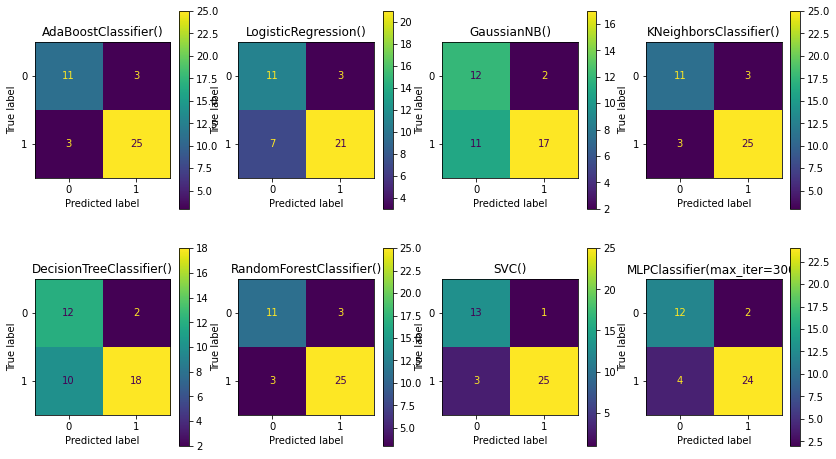

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(14,8))
for i,model in enumerate(model_list):
    plt.subplot(2,4,i+1); ax = plt.gca()
    plt.title(str(model))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,ax=ax) 
plt.show() 

### Interpretation of Results

Write an executive summary (max 2 page report) on the result of the classifiers from the sonar data set. Report the confusion matrix in the test set. What recommendation do you give on detecting pipe versus rock?